<a href="https://colab.research.google.com/github/sanjprasad/Data-Wrangling-and-Visualization/blob/main/Github_Submission_Sanjna_Prasad_HW2_Data_Wrangling_and_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# CODING CHALLENGE
---

This is a **coding challenge** for today:
1. load a new dataset from here: https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt
this dataset is taken from the cancer genome atlas (TCGA) with 2 cancer types - liver and breast
2. Find and check the level of expression for a gene that is specific to breast cancer (for example, ERBB2)
3. Find  and check the level of expression for a gene that is specific to liver cancer (for example, CNDP1)
4. find out what are these genes
5. consider what is the measure of significance - what helped you be sure these genes have specificity to a group of samples ("replicates")

# **Summary**

In this coding challenge we are investigating cancer gene expression dataset that looks at gene expression on both tumor and non-tumor tissues that are related to expression of genes that cause either breast cancer or liver cancer. The question posed is do these genes we're looking at have a specific significance on expression. Specifically, I'm looking at the RAD51C, an important expression gene in breast cancer, and TP53, a well-known gene involved with liver cancer manifestation. I hope to see the significance of expression in both tumor and non tumor tissues in all the samples, and in both breast cancer and liver cancer samples separately. In the dataset, rows represent the various genes we're looking at while the columns are the various tissue samples that are classified as either breast or liver cancer related and also tumor or non-tumor. After running a variety of t-tests comparing all tumor and non tumor expression, just liver tumor and non tumor expression, and just breast cancer tumor and non tumor expression, we can adequately say that both RAD51C and TP53 are important genes in breast cancer and liver cancer respectively. They affect expression significantly and the p-values indicated that the null hypothesis was correct correlating that they were significant in affecting the difference in expression in tumor and non tumor samples. 

# **Data Preparation**

**Question 1: Load the dataset + fixing formating**

In this chunk, I'm loading the dataset and fixing the formatting so that it can be used in the future!

In [1]:
!pip install researchpy --q

In [2]:
#importing libraries for this assignment
import pandas as pd
import numpy as np
import scipy as scipy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading in the dataset
cancerGenome = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt')
cancerGenome.index=cancerGenome['Id'] #setting first column as index
cancerGenome = cancerGenome.drop(['Id'], axis=1) #setting the column to be dropped
classNames = cancerGenome.iloc[0] #saving the class names just in case
cancerGenome = cancerGenome.drop(['class'], axis=0) #dropping the class row as well in order to plot later on
#classNames #this is commented out right now but I was double checking to make sure the right thing was in this variable
cancerGenome #making sure the dataset looks how I want it to

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764
a10431,1561,1297,1423,1454,1125,2128,408.076,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX|7791,4869,10756,3708,2799,1661,4915,3507.2482,5458.7489,5691.3529,6455.873,6038.9281,2344.7047
ZZEF1|23140,1366,1533,1606,493,320,638,1894.9342,942.883,781.1336,1314.2857,1477.386,1997.9633
ZZZ3|26009,783,1746,412,486,694,482,1180.4565,509.5195,700.8688,968.254,620.9685,730.6517


# **Exploratory Analysis and Visualization**

**Question 2: Looking at the expression of specific breast cancer gene**

In this section, I'm first looking at the expression of the RAD51C gene using the .loc command, where the result gives us each of the corresponding samples and expression in those tissues. I then use a barplot to graph the expression and visually see the difference in expression in each of the tissues. Based off of the graph, we see that RAD51C expression is high in all breast cancer tissues, and high in tumor tissues in liver cancer samples, but not in the non-tumor tissues. 

---



In [4]:
#Question 2: Looking at the expression of specific breast cancer gene
cancerGenome = cancerGenome.astype(float) #making all the data types floats so it can be plotted
#calling the gene to look at the expression of each sample(each row is a gene and the columns are the samples)
cancerGenome.loc["RAD51C|5889"]


TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    438.0000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    711.0000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP    311.0000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT    129.0000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT    129.0000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT    211.0000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    342.2462
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP    232.0943
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    339.2635
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    392.6984
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT    251.6220
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT    311.6090
Name: RAD51C|5889, dtype: float64

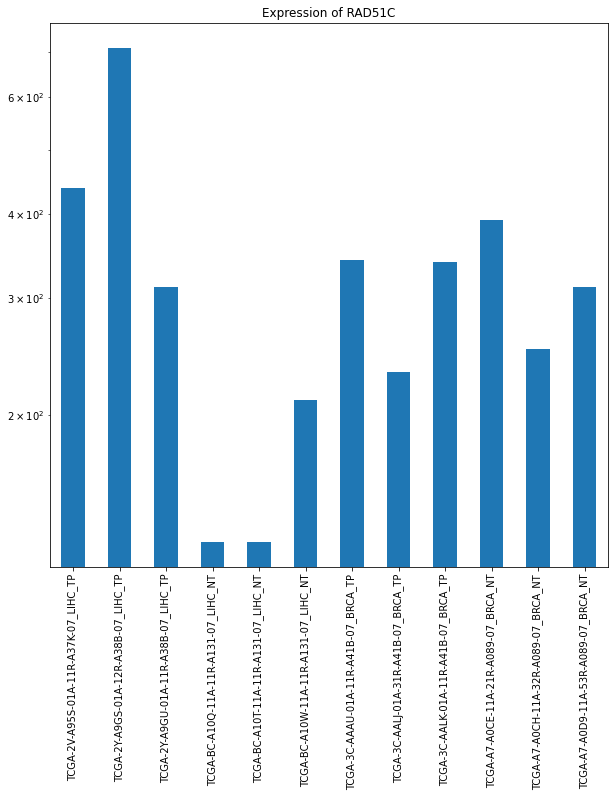

In [5]:
cancerGenomeT = cancerGenome.transpose() #transposing in order to plot
cancerGenomeT["RAD51C|5889"].plot.bar(rot=90, figsize=(10,10), logy = True, title = "Expression of RAD51C") #plotting the expression of the gene

**Question 3: Looking at the expression of a specific liver cancer**


In this section, I'm first looking at the expression of the TP53 gene using the .loc command, where the result gives us each of the corresponding samples and expression in those tissues. I then use a barplot to graph the expression and visually see the difference in expression in each of the tissues. We see in the bar plot that the expresssion in almost all the liver cancer tumor tissues samples and breast cancer non-tumor tissues samples is high while expression for all non-tumor liver samples is low. Expression in breast cancer non-tumor is fairly high for all samples except one. 


In [6]:
cancerGenome.loc["TP53|7157"]  #using the loc command to look at gene expression for the TP53 gene


TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    1704.0000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    2387.0000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     700.0000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT     816.0000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT    1025.0000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT     796.0000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    1385.5285
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP    1289.2112
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    1418.2871
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    1522.2222
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT    1373.5778
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     661.4053
Name: TP53|7157, dtype: float64

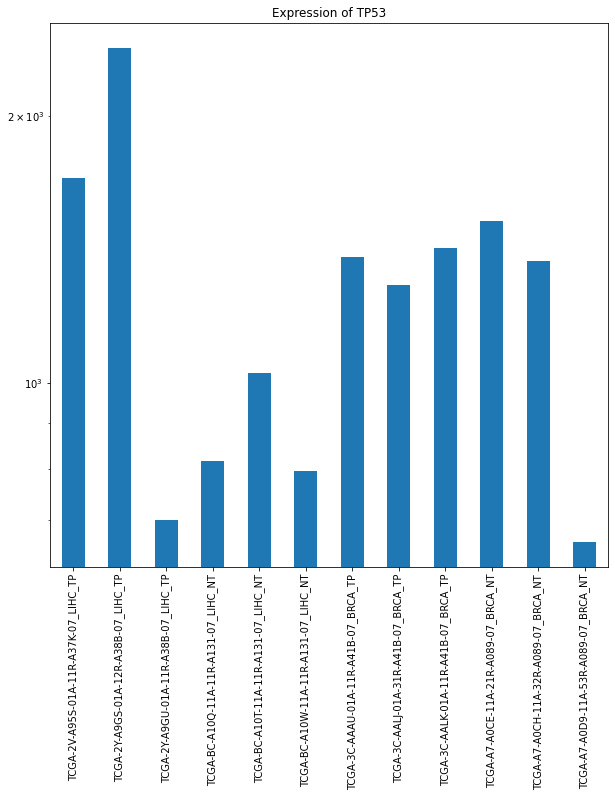

In [7]:
cancerGenomeT["TP53|7157"].plot.bar(rot=90, figsize=(10,10), logy = True, title = "Expression of TP53") #plotting the expression of the gene

**Question 4: Find out what these genes are**


In this section, I did some research about both the breast cancer and liver gene I picked to get some background information and cited my sources!



*   **Breast cancer gene - RAD51C:**
The RAD51C gene makes a protein vital for repairing DNA, which binds to DNA at the break and creates a "protein sheath", which is the first step that must occur for DNA repair (3). Mutations in RAD51C results in an increased susceptibility to breast cancer and is considered a breast cancer susceptibility gene (1).    
*   **Liver cancer gene - TP53:** 
The TP53 gene results in the production of an important protein involved in tumor supression. The protein, p53, induces apoptosis of damaged cell or repair of DNA if possible (4). TP53 is an important gene with all cancers, and has been noted to be one of the most prominent mutations in liver cancers, suggesting it could be an "early marker of tumororigenesis" (2).



Citations for above information:


1.   Somyajit, Kumar, Shreelakshmi Subramanya, and Ganesh Nagaraju. "RAD51C: a novel cancer susceptibility gene is linked to Fanconi anemia and breast cancer." Carcinogenesis 31.12 (2010): 2031-2038.
2.   Guimaraes, D. P., and P. Hainaut. "TP53: a key gene in human cancer." Biochimie 84.1 (2002): 83-93.
3. “Rad51 Gene: Medlineplus Genetics.” MedlinePlus, U.S. National Library of Medicine, https://medlineplus.gov/genetics/gene/rad51/. 
4. “TP53 Gene: Medlineplus Genetics.” MedlinePlus, U.S. National Library of Medicine, https://medlineplus.gov/genetics/gene/tp53/. 










# **Specific Test for Significance**

**Question 5: Consider what is the measure of significance:**

In [8]:
#to use t-test, we need to install a package called "researchpy" 
#this was taken from the omicslogic course
!pip install researchpy --q

In [9]:
#load packages
import researchpy as rp
import scipy.stats as stats

In the chunk below, I'm fixing the dataset I set aside to use for this question, utilizing the same method we did in class.

In [10]:
cancerGenome1 = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt') #making a second to be used for question 5

cancerGenome1.index = cancerGenome1.Id

sample_class = cancerGenome1.loc["class"]

cancerGenome1 = cancerGenome1.drop(["class"], axis = 0)
cancerGenome1 = cancerGenome1.drop(["Id"], axis = 1)

cancerGenome1 = cancerGenome1.apply(pd.to_numeric)
cancerGenome1.index = cancerGenome1.index.str.replace("|", "_")



In [11]:
cancerGenome1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517


In the two chunks below, I'm making a dataframe with the tumor expression and another data frame with the non-tumor expression, which can be used for the t-test.

In [12]:
#creating separate variables of tumor expression in liver and breast cancer tissues
TumorExpression_LIHC = cancerGenome1.iloc[:, 0:3]
TumorExpression_BRCA = cancerGenome1.iloc[:, 6:9]
#combining the two variables to have one tumor expression table
TumorExpression = pd.concat([TumorExpression_LIHC, TumorExpression_BRCA], join = "outer", axis =1)
TumorExpression



,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP
Id,,,,,,
a100130426,0.00,0.00,0.00,0.0000,0.9066,0.0000
a100133144,2.31,53.59,6.86,16.3644,11.6228,12.0894
a100134869,5.69,5.41,6.14,12.9316,9.2294,11.0799
a10357,138.30,144.07,73.93,52.1503,154.2974,143.8643
a10431,1561.00,1297.00,1423.00,408.0760,1360.8341,865.5358
...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,3507.2482,5458.7489,5691.3529
ZZEF1_23140,1366.00,1533.00,1606.00,1894.9342,942.8830,781.1336
ZZZ3_26009,783.00,1746.00,412.00,1180.4565,509.5195,700.8688


In [13]:
#creating variables of non-tumor expression in liver and breast cancer tissues
NTExpression_LIHC = cancerGenome1.iloc[:,3:6]
NTExpression_BRCA = cancerGenome1.iloc[:, 9:12]
#combining the two tables to have one non-tumor expression table
NTExpression = pd.concat([NTExpression_LIHC, NTExpression_BRCA], join = "outer", axis =1)
NTExpression

,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,
a100130426,0.00,0.00,0.00,0.0000,0.0000,0.0000
a100133144,2.00,1.41,4.94,4.3333,4.2087,3.0550
a100134869,0.00,2.59,1.06,3.9206,2.1852,0.0000
a10357,103.92,96.89,97.03,78.9238,53.6380,87.5764
a10431,1454.00,1125.00,2128.00,978.4127,970.7569,770.3666
...,...,...,...,...,...,...
ZYX_7791,2799.00,1661.00,4915.00,6455.8730,6038.9281,2344.7047
ZZEF1_23140,493.00,320.00,638.00,1314.2857,1477.3860,1997.9633
ZZZ3_26009,486.00,694.00,482.00,968.2540,620.9685,730.6517


In the chunk below, I'm running a t-test in order to see which genes are statistically significant when it comes to tumor vs non-tumor expression in all the tissues. 

In [14]:
#running a t-test to see statistical significance when it comes to tumor vs non-tumor expression
TvsNT_result = scipy.stats.ttest_ind(TumorExpression, NTExpression, equal_var=True, axis = 1).pvalue
GeneExpression1 = cancerGenome1
GeneExpression1 ["TvsNT_p-value"] = TvsNT_result
GeneExpression1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,TvsNT_p-value
Id,,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.340893
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550,0.098109
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.000810
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764,0.131917
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666,0.756878
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047,0.259592
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633,0.348045
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517,0.322508


In the chunk below here, I'm specifically running a t-test on tumor and non-tumor expression in BRCA tissues to see if my gene of choice is considered statistically significant in the relevant tissues and to see if the gene I chose for liver cancer is also statistically significant in other tissues..



In [15]:
#specifically running a t-test in the breast cancer tissues comparing tumor and non-tumor expression
BRCA_TvsNT_result = scipy.stats.ttest_ind(TumorExpression_BRCA, NTExpression_BRCA, equal_var=True, axis = 1).pvalue
GeneExpression1 ["BRCA-TvsNT_p-value"] = BRCA_TvsNT_result
GeneExpression1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,TvsNT_p-value,BRCA-TvsNT_p-value
Id,,,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.340893,0.373901
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550,0.098109,0.003710
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.000810,0.004384
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764,0.131917,0.271066
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666,0.756878,0.925098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047,0.259592,0.969213
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633,0.348045,0.388805
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517,0.322508,0.921093


In the chunk below here, I'm specifically running a t-test on tumor and non-tumor expression in LIHC tissues to see if my gene of choice is considered statistically significant with the relevant tissues and to compare to the breast cancer gene I chose.


In [16]:
#running another t-test to look at the expression of the gene in non tumor and tumor tissues
LIHC_TvsNT_result = scipy.stats.ttest_ind(TumorExpression_LIHC, NTExpression_LIHC, equal_var=True, axis = 1).pvalue
GeneExpression1 ["LIHC-TvsNT_p-value"] = LIHC_TvsNT_result
GeneExpression1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,TvsNT_p-value,BRCA-TvsNT_p-value,LIHC-TvsNT_p-value
Id,,,,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.340893,0.373901,NaN
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550,0.098109,0.003710,0.331431
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.000810,0.004384,0.004399
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764,0.131917,0.271066,0.437173
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666,0.756878,0.925098,0.665620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047,0.259592,0.969213,0.235732
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633,0.348045,0.388805,0.000935
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517,0.322508,0.921093,0.350447


In the chunk below, I'm using the .loc method again to look at the p-values for the t-tests run to come up with a better analysis.

In [18]:
#pulling the RAD51C row to easily analyze it
GeneExpression1.loc["RAD51C_5889"]

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    438.000000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    711.000000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP    311.000000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT    129.000000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT    129.000000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT    211.000000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    342.246200
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP    232.094300
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    339.263500
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    392.698400
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT    251.622000
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT    311.609000
TvsNT_p-value                             0.078426
BRCA-TvsNT_p-value                        0.808926
LIHC-TvsNT_p-value                        0.052601
Name: RAD51C_5889, dtype: float64

With t-tests, we know if the p-value is less than 0.05, it is considered statistically significant. In the case of these null hypotheses, with all of these tests, the null hypothesis is that RAD51C is a significant gene when it comes to expression in tissues, which is the conclusion drawn from the literature and from the dataset visualization. With my chosen gene of RAD51C, we see that the p-value with all tissues, just BRCA tissues, and just LIHC tissues, are all higher than 0.05. This indicates that our p-values are not statistically significant and that we would not reject the null hypothesis as it hasn't been found to be false. Thus, we can conclude based off the p-values and with sufficient evidence, that RAD51C is a significant gene when comes to expression in tissues. We can see by compariing the p-values that the p-value is much higher in the breast cancer tissues indicating that the significance of RAD51C in breast cancer tissues is much higher, which makes sense as it's an important gene in breast cancer. 

In [19]:
#pulling the TP53 gene row to look at the p-values
GeneExpression1.loc["TP53_7157"]

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    1704.000000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    2387.000000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     700.000000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT     816.000000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT    1025.000000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT     796.000000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    1385.528500
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP    1289.211200
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    1418.287100
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    1522.222200
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT    1373.577800
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     661.405300
TvsNT_p-value                              0.123165
BRCA-TvsNT_p-value                         0.542260
LIHC-TvsNT_p-value                         0.220812
Name: TP53_7157, dtype: float64

With t-tests, we know if the p-value is less than 0.05, it is considered statistically significant. In the case of these null hypotheses, with all of these tests, the null hypothesis here is that TP53 is a significant gene when it comes to expression in tissues. With my chosen gene of TP53, we see that the p-value of all tissues and just breast cancer and just liver cancer are greater than 0.05. This indicates that this p-value is not statistically significant and that we would not reject the null hypothesis for this test as it hasn't been found to be false. Thus, we can conclude based off the p-values and sufficient evidence, that TP53 is a significant gene when comes to expression in BRCA tissues, liver tissues and all tissues. Interestingly, the p-value is much higher with the BRCA liver and non liver tissues as opposed to the liver cancer tissues.

# **Conclusion**

From the specific t-test that was conducted, we saw that RAD51C is a  important effector when it comes to gene expression across all the tissue types, this is supported by the literature which has shown that RAD51C is an big reason for breast cancer development. We see that with TP53 that it is a significant gene with expression across all tissues as well. This reaffirms what the literature says as both of these genes are important when it comes to cancer gene expression. 